In [11]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [12]:
# Import The Libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers, Sequential

import cv2

import numpy as np
from glob import glob
#import matplotlib.pyplot as plt
import sklearn


In [13]:
# directories
weights_directory = "..\classification\weights"
results_directory = "..\classification\results"
path_dataset_men = "..\dataset_classificazione\men"
path_dataset_women = "..\dataset_classificazione\women"

In [14]:
# Set Resize variable
IMAGE_SIZE = (224, 224)

In [28]:
''' Arguments:
    - include_top: whether to include the fully-connected layer at the top of the network.
    - weights: 'imagenet' (pre-training on ImageNet)
    - input_tensor: optional Keras tensor to use as image input for the model.
    - input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input      shape has to be (224, 224, 3)
    - pooling: Optional pooling mode for feature extraction when include_top is False.
            None means that the output of the model will be the 4D tensor output of the last convolutional block.
            avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
            max means that global max pooling will be applied.
    - classes: optional number of classes to classify images into, only to be specified if include_top is True,     and if no weights argument is specified.
    - classifier_activation: The activation function to use on the "top" layer.
'''

resnet = ResNet50(
    input_shape = (224,224,3), # Making the image into 3 Channel
    weights = 'imagenet',
    include_top = False,
    pooling = 'avg'
)

In [29]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Create a model Object
model = tf.keras.models.Sequential()
model.add(resnet)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [18]:
import os

# Codice per ottenere il path delle immagini da classificare

imgs_list_men = [os.path.join(path_dataset_men, img_name) for img_name in os.listdir(path_dataset_men)]
imgs_list_women = [os.path.join(path_dataset_women, img_name) for img_name in os.listdir(path_dataset_women)]
imgs_list = imgs_list_men + imgs_list_women

print("Numero totale immagini: " + str(len(imgs_list)))

imgs_array = []
for file_path in imgs_list:
    #print(file_path)
    img = cv2.imread(file_path)
    if img is None:
        print('Wrong path:', file_path)
    else:
        img = cv2.resize(img, IMAGE_SIZE)
        #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs_array.append(img)

Numero totale immagini: 1373
..\dataset_classificazione\men\0_BALENCIAGA_leather.jpg
..\dataset_classificazione\men\100_GUCCI_polyurethane+polyester.jpg
..\dataset_classificazione\men\101_SAINT-LAURENT_raffia.jpg
..\dataset_classificazione\men\102_GUCCI_calf-leather.jpg
..\dataset_classificazione\men\103_GUCCI_leather+fabric.jpg
..\dataset_classificazione\men\104_SAINT-LAURENT_fabric.jpg
..\dataset_classificazione\men\105_BALENCIAGA_fabric.jpg
..\dataset_classificazione\men\106_GUCCI_leather.jpg
..\dataset_classificazione\men\107_SAINT-LAURENT_calf-leather.jpg
..\dataset_classificazione\men\108_GUCCI_fabric.jpg
..\dataset_classificazione\men\109_GUCCI_fabric.jpg
..\dataset_classificazione\men\10_GUCCI_fabric.jpg
..\dataset_classificazione\men\110_SAINT-LAURENT_fabric.jpg
..\dataset_classificazione\men\111_GUCCI_fabric.jpg
..\dataset_classificazione\men\112_GUCCI_fabric.jpg
..\dataset_classificazione\men\113_SAINT-LAURENT_fabric.jpg
..\dataset_classificazione\men\114_GUCCI_polyurethane.

In [19]:
import ntpath

# creazione delle etichette delle immagini
possible_materials = set()
for image_path in imgs_list:
    head, image_name = ntpath.split(image_path)
    index, brand, material = image_name.split('_')
    materials = material.split('+')
    for materiale in materials:
        possible_materials.add(materiale.split('.')[0])
list_possible_materials = list(possible_materials)

print("Numero possibili materiali: " + str(len(possible_materials)))
print(list_possible_materials)

labels = []

for image_path in imgs_list:
    head, image_name = ntpath.split(image_path)
    index, brand, material = image_name.split('_')
    materials = material.split('+')
    label = np.zeros(shape=len(possible_materials), dtype=float)
    for materiale in materials:
        materiale = materiale.split('.')[0]
        indice = list_possible_materials.index(materiale)
        label[indice] = 1
    labels.append(label)

print(str(len(labels)))

Numero possibili materiali: 22
['calf-leather', 'cow-leather', '100%-cotton', 'lamb-leather', 'polyurethane', 'brass', 'mercerised-cotton', 'raffia', 'jute', 'goat-leather', 'polyester', 'organic-cotton', 'leather', 'palm-leaf', 'Plexiglas', 'velvet', 'canvas', 'plastic', 'fabric', 'lamb-fur', 'ethylene-vinyl-acetate', 'recycled-nylon']
1373


[[[226 221 218]
  [226 221 218]
  [226 221 218]
  ...
  [226 221 218]
  [226 221 218]
  [226 221 218]]

 [[226 221 218]
  [226 221 218]
  [226 221 218]
  ...
  [226 221 218]
  [226 221 218]
  [226 221 218]]

 [[226 221 218]
  [226 221 218]
  [226 221 218]
  ...
  [226 221 218]
  [226 221 218]
  [226 221 218]]

 ...

 [[230 227 223]
  [230 227 223]
  [230 227 223]
  ...
  [230 227 223]
  [230 227 223]
  [230 227 223]]

 [[230 227 223]
  [230 227 223]
  [230 227 223]
  ...
  [230 227 223]
  [230 227 223]
  [230 227 223]]

 [[230 227 223]
  [230 227 223]
  [230 227 223]
  ...
  [230 227 223]
  [230 227 223]
  [230 227 223]]]
..\dataset_classificazione\men\0_BALENCIAGA_leather.jpg


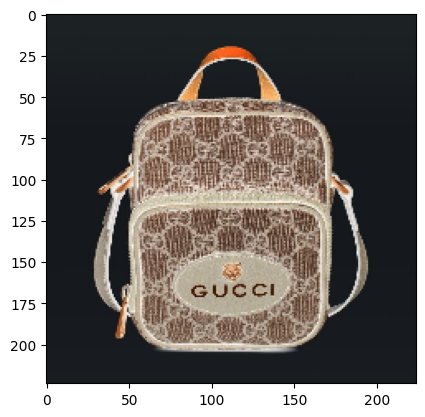

In [23]:
from matplotlib import pyplot as plt

print(imgs_array[0])
print(imgs_list[0])

imgplot = plt.imshow(255-imgs_array[1], vmin=0, vmax=255)

In [24]:
from sklearn.model_selection import train_test_split

images_array, labels_array = sklearn.utils.shuffle(imgs_array, labels, random_state=15)
Xtrain, X_test, Ytrain, Y_test = train_test_split(images_array,labels_array, test_size=0.10,  random_state=15)
X_train, X_valid, Y_train, Y_valid = train_test_split(Xtrain, Ytrain, test_size=0.2,  random_state=15)

X_train = np.asarray(X_train)
X_valid = np.asarray(X_valid)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_valid = np.asarray(Y_valid)
Y_test = np.asarray(Y_test)

In [25]:
'''history = model.fit_generator(
    (X_train, Y_train),
    validation_data = (X_valid, Y_valid),
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)'''

NameError: name 'training_set' is not defined